In [3]:
import sys
sys.path.append("../../")

import gym
import matplotlib.pyplot as plt
import numpy as np

from homeworks.Nabatchikov_practice1.Nabatchikov_practice1_1 import CrossEntropyAgent
from homeworks.Nabatchikov_practice4.Nabatchikov_practice4_1 import get_epsilon_greedy_action, q_learning

In [4]:
def MonteCarlo(env, episode_n, trajectory_len=500, gamma=0.99):
    total_rewards = []
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))
    counter = np.zeros((state_n, action_n))
    
    for episode in range(episode_n):
        epsilon = 1 - episode / episode_n
        trajectory = {'states': [], 'actions': [], 'rewards': []}
        
        state = env.reset()
        for _ in range(trajectory_len):
            trajectory['states'].append(state)
            
            action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
            trajectory['actions'].append(action)
            
            state, reward, done, _ = env.step(action)
            trajectory['rewards'].append(reward)
            
            if done:
                break
        total_rewards.append(sum(trajectory['rewards']))
        
        real_trajectory_len = len(trajectory['rewards'])
        returns = np.zeros(real_trajectory_len + 1)
        for t in range(real_trajectory_len - 1, -1, -1):
            returns[t] = trajectory['rewards'][t] + gamma * returns[t + 1]
            
        for t in range(real_trajectory_len):
            state = trajectory['states'][t]
            action = trajectory['actions'][t]
            qfunction[state][action] += (returns[t] - qfunction[state][action]) / (1 + counter[state][action])
            counter[state][action] += 1
            
    return total_rewards


In [3]:
def SARSA(env, episode_n, gamma=0.99, trajectory_len=500, alpha=0.5):
    total_rewards = np.zeros(episode_n)
    state_n = env.observation_space.n
    action_n = env.action_space.n
    qfunction = np.zeros((state_n, action_n))

    for episode in range(episode_n):
        epsilon = 1 / (episode + 1)

        state = env.reset()
        action = get_epsilon_greedy_action(qfunction[state], epsilon, action_n)
        for _ in range(trajectory_len):
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(qfunction[next_state], epsilon, action_n)

            qfunction[state][action] += alpha * (reward + gamma * qfunction[next_state][next_action] - qfunction[state][action])

            state = next_state
            action = next_action

            total_rewards[episode] += reward

            if done:
                break


    return total_rewards

In [4]:
STATE_N = 500
ACTION_N = 6
agent = CrossEntropyAgent(state_n=STATE_N, action_n=ACTION_N)
result = agent.train(
    trajectory_n=100,
    iteration_n=7,
    max_length=1000,
    q_param=0.6,
    laplace_smoothing=0.0,
    policy_smoothing=1.0,
    debug=False
)

env = gym.make("Taxi-v3")
montecarlo_total_rewards = MonteCarlo(env, episode_n=700, trajectory_len=1000, gamma=0.99)
sarsa_total_rewards = SARSA(env, episode_n=700, trajectory_len=1000, gamma=0.999, alpha=0.5)
q_learning_total_rewards = q_learning(env, episode_n=700, trajectory_len=1000, gamma=0.99)
cross_entropy_reward = [r["mean_total_reward"] for r in result["info"]]


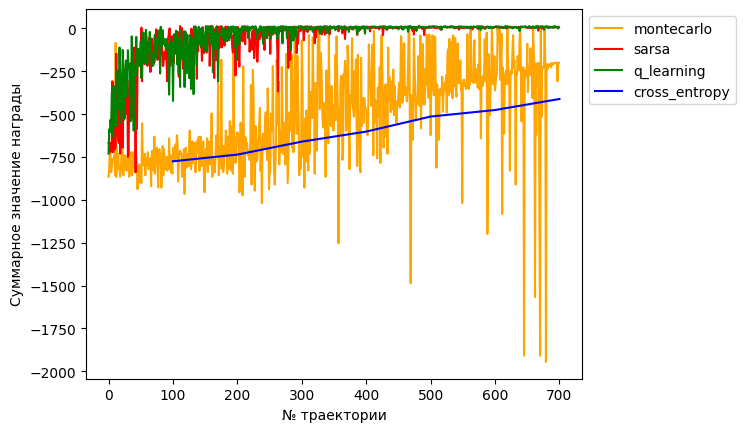

In [14]:
plt.plot(montecarlo_total_rewards, label="montecarlo", color="orange")
plt.plot(sarsa_total_rewards, label="sarsa", color="red")
plt.plot(q_learning_total_rewards, label="q_learning", color="green")
plt.plot(range(100, 800, 100), cross_entropy_reward, label="cross_entropy", color="blue")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

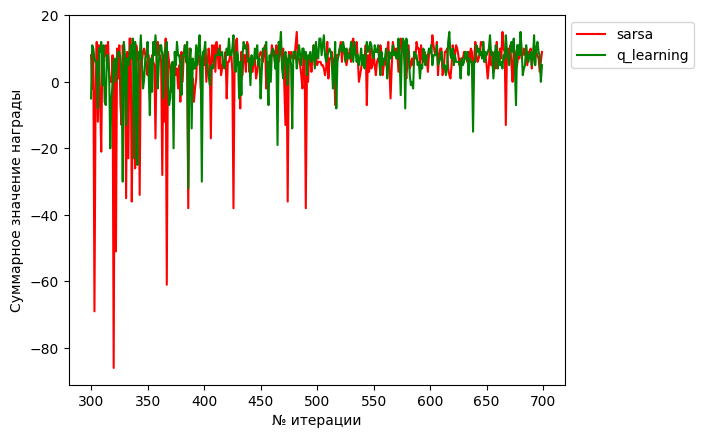

In [16]:
plt.plot(range(300, 700), sarsa_total_rewards[300:], label="sarsa", color="red")
plt.plot(range(300, 700), q_learning_total_rewards[300:], label="q_learning", color="green")
plt.xlabel('№ итерации')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Task2

In [7]:
from Nabatchikov_practice2.Nabatchikov_practice2_1 import CEM
from Nabatchikov_practice4.Nabatchikov_practice4_2 import MonteCarlo, SARSA, q_learning

In [8]:
env = gym.make('Acrobot-v1')

montecarlo_total_rewards = MonteCarlo(env, episode_n=700, trajectory_len=1000, gamma=0.99)
sarsa_total_rewards = SARSA(env, episode_n=700, trajectory_len=1000, gamma=0.999, alpha=0.5)
q_learning_total_rewards = q_learning(env, episode_n=700, trajectory_len=1000, gamma=0.99)

agent = CEM(state_dim=6, action_n=3)
result = agent.fit(env=env, epochs=7, q_param=0.9, trajectory_n=100, trajectory_len=1000)
deep_cross_entropy_reward = [r["mean_total_reward"] for r in result["info"]]

n_finished: 41
n_finished: 264
n_finished: 265


/Users/ilyanabatchikov/Library/Caches/pypoetry/virtualenvs/ods-deep-rl-e31fa5SG-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


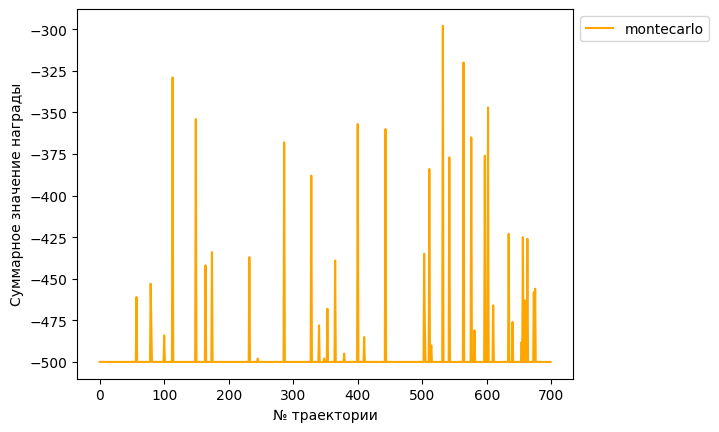

In [12]:
plt.plot(montecarlo_total_rewards, label="montecarlo", color="orange")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

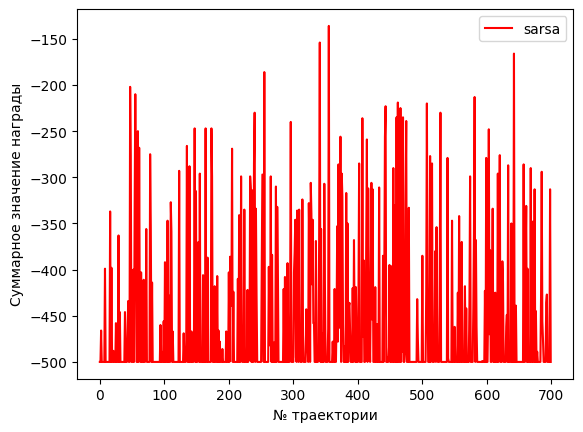

In [13]:
plt.plot(sarsa_total_rewards, label="sarsa", color="red")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

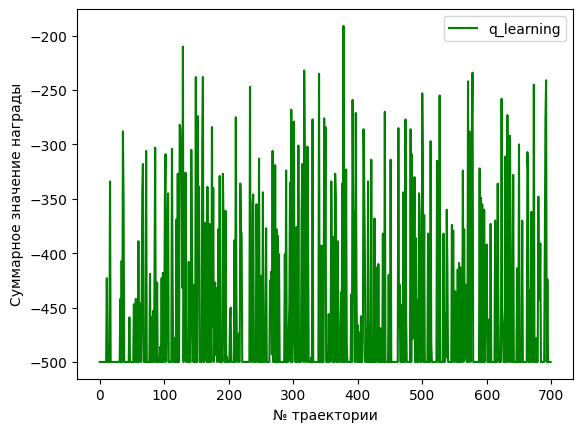

In [16]:
plt.plot(q_learning_total_rewards, label="q_learning", color="green")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

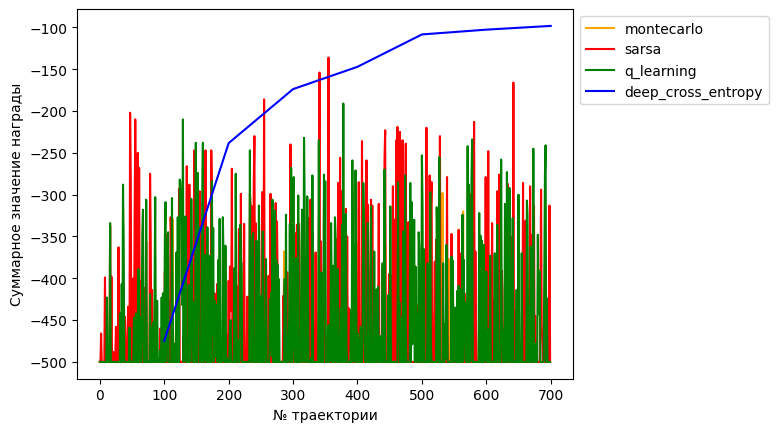

In [15]:
plt.plot(montecarlo_total_rewards, label="montecarlo", color="orange")
plt.plot(sarsa_total_rewards, label="sarsa", color="red")
plt.plot(q_learning_total_rewards, label="q_learning", color="green")
plt.plot(range(100, 800, 100), deep_cross_entropy_reward, label="deep_cross_entropy", color="blue")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))

# Task 3

In [8]:


from homeworks.Nabatchikov_practice4.Nabatchikov_practice4_3 import MonteCarloEps

env = gym.make("Taxi-v3")
montecarlo_total_rewards = MonteCarlo(env, episode_n=700, trajectory_len=1000, gamma=0.99)



In [73]:
montecarloeps_total_rewards = MonteCarloEps(env, episode_n=700, trajectory_len=1000, gamma=0.99, decay_rate=0.009)

In [68]:
res = {p: MonteCarloEps(env, episode_n=700, trajectory_len=1000, gamma=0.99, decay_rate=p) for p in np.arange(0, 0.01, 0.001)}

In [69]:
max_key = max(res, key=res.get)

print(f"Лучший decay_rate: {max_key} значение: {res[max_key]}")

Лучший decay_rate: 0.009000000000000001 значение: -390.86857142857144


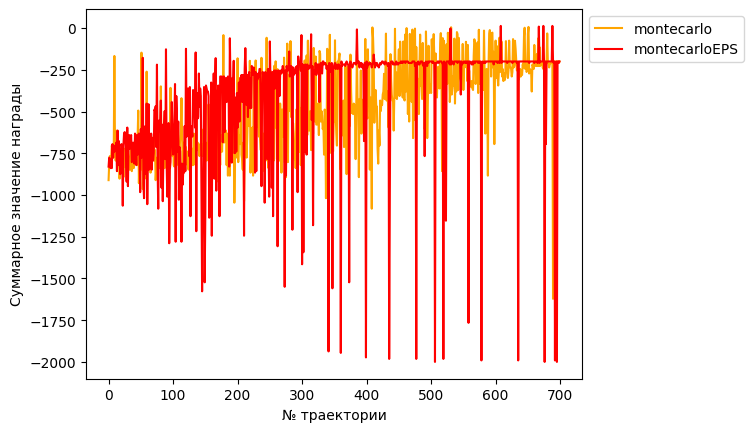

In [74]:
plt.plot(montecarlo_total_rewards, label="montecarlo", color="orange")
plt.plot(montecarloeps_total_rewards, label="montecarloEPS", color="red")
plt.xlabel('№ траектории')
plt.ylabel('Суммарное значение награды')
plt.legend(loc='best', bbox_to_anchor=(1, 1))